# <font color = blue>[Data Cleaning + Feature Engineering]</font>

## <font color = blue>Import Packages</font>

In [2]:
import pandas as pd
from sodapy import Socrata # for API
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import missingno as msno
import datetime

## <font color = blue>Link API Data</font>

In [3]:
client = Socrata("data.usaid.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.usaid.gov,
#                  MyAppToken,
#                  userame="",
#                  password="")

results = client.get("a3rc-nmf6", limit=10324)
# Convert to pandas DataFrame
supply_df = pd.DataFrame.from_records(results)

In [4]:
supply_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   id                            10324 non-null  object
 1   project_code                  10324 non-null  object
 2   pq                            10324 non-null  object
 3   po_so                         10324 non-null  object
 4   asn_dn                        10324 non-null  object
 5   country                       10324 non-null  object
 6   managed_by                    10324 non-null  object
 7   fulfill_via                   10324 non-null  object
 8   vendor_inco_term              10324 non-null  object
 9   shipment_mode                 9964 non-null   object
 10  pq_first_sent_to_client_date  10324 non-null  object
 11  po_sent_to_vendor_date        10324 non-null  object
 12  scheduled_delivery_date       10324 non-null  object
 13  delivered_to_cli

In [5]:
supply_df.head()

,id,project_code,pq,po_so,asn_dn,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,dosage,line_item_insurance_usd
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,19,551.0,29.0,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,NaN,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,1000,6200.0,6.2,0.03,"Aurobindo Unit III, India",True,358,4521.5,10mg/ml,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,500,40000.0,80.0,0.8,ABBVIE GmbH & Co.KG Wiesbaden,True,171,1653.78,NaN,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",True,1855,16007.06,150mg,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,38000,121600.0,3.2,0.05,"Aurobindo Unit III, India",True,7590,45450.08,30mg,NaN


In [6]:
supply_df["scheduled_delivery_date"].head()

0     2-Jun-06
1    14-Nov-06
2    27-Aug-06
3     1-Sep-06
4    11-Aug-06
Name: scheduled_delivery_date, dtype: object

In [7]:
supply_df.shape

(10324, 33)

In [8]:
supply_df.dtypes

id                              object
project_code                    object
pq                              object
po_so                           object
asn_dn                          object
country                         object
managed_by                      object
fulfill_via                     object
vendor_inco_term                object
shipment_mode                   object
pq_first_sent_to_client_date    object
po_sent_to_vendor_date          object
scheduled_delivery_date         object
delivered_to_client_date        object
delivery_recorded_date          object
product_group                   object
sub_classification              object
vendor                          object
item_description                object
molecule_test_type              object
brand                           object
dosage_form                     object
unit_of_measure_per_pack        object
line_item_quantity              object
line_item_value                 object
pack_price               

## <font color = blue>Data Cleaning </font>

- ###  <font color = blue>Change Data Types </font>

In [9]:
supply_df['scheduled_delivery_date'] = pd.to_datetime(supply_df['scheduled_delivery_date'])
supply_df['delivered_to_client_date'] = pd.to_datetime(supply_df['delivered_to_client_date'])
supply_df['delivery_recorded_date'] = pd.to_datetime(supply_df['delivery_recorded_date'])
supply_df[['unit_price', 'pack_price','line_item_value','line_item_insurance_usd']] = supply_df[['unit_price', 'pack_price','line_item_value','line_item_insurance_usd']].astype(float)
supply_df[['line_item_quantity', 'unit_of_measure_per_pack','id']] = supply_df[['line_item_quantity', 'unit_of_measure_per_pack','id']].astype(int)

In [10]:
supply_df.dtypes

id                                       int64
project_code                            object
pq                                      object
po_so                                   object
asn_dn                                  object
country                                 object
managed_by                              object
fulfill_via                             object
vendor_inco_term                        object
shipment_mode                           object
pq_first_sent_to_client_date            object
po_sent_to_vendor_date                  object
scheduled_delivery_date         datetime64[ns]
delivered_to_client_date        datetime64[ns]
delivery_recorded_date          datetime64[ns]
product_group                           object
sub_classification                      object
vendor                                  object
item_description                        object
molecule_test_type                      object
brand                                   object
dosage_form  

- ### <font color = blue>Deal with Missing Values</font>

In [11]:
supply_df.isnull().sum() #Find out missing values

id                                 0
project_code                       0
pq                                 0
po_so                              0
asn_dn                             0
country                            0
managed_by                         0
fulfill_via                        0
vendor_inco_term                   0
shipment_mode                    360
pq_first_sent_to_client_date       0
po_sent_to_vendor_date             0
scheduled_delivery_date            0
delivered_to_client_date           0
delivery_recorded_date             0
product_group                      0
sub_classification                 0
vendor                             0
item_description                   0
molecule_test_type                 0
brand                              0
dosage_form                        0
unit_of_measure_per_pack           0
line_item_quantity                 0
line_item_value                    0
pack_price                         0
unit_price                         0
m

<AxesSubplot:>

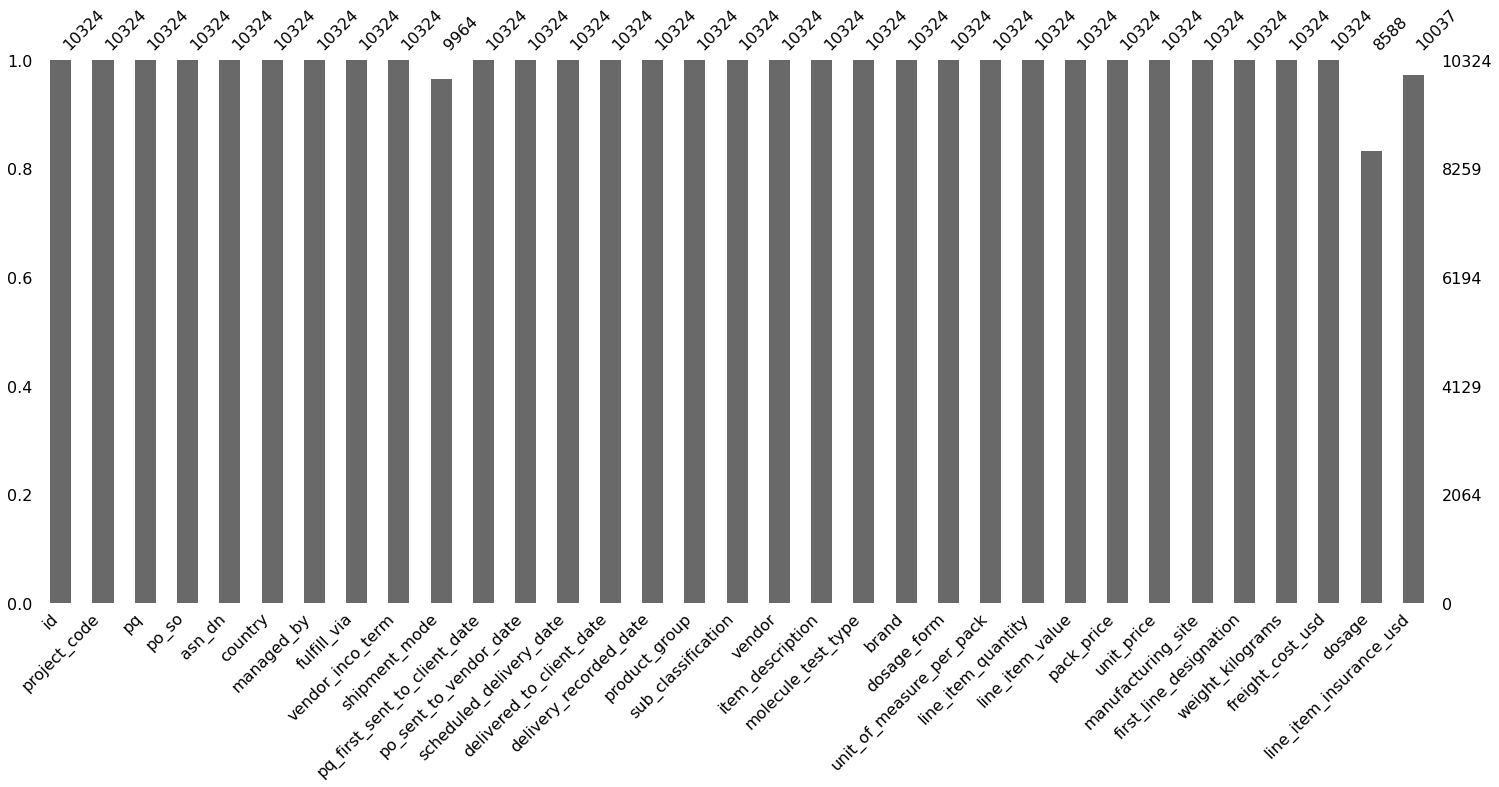

In [12]:
msno.bar(supply_df, labels=True)

### From the bar plot, we can see that 'dosage'has the most missing values, which reaches 20% of all the observations. 'shipment_mode' and 'line_item_insurance_usd' also have missing values.

In [13]:
len(supply_df[(supply_df['dosage'].isna()==True) & (supply_df['dosage_form']=='Test kit')])

1575

In [14]:
len(supply_df[(supply_df['dosage'].isna()==True) & (supply_df['dosage_form']=='Test kit - Ancillary')])

161

### All the null values of 'dosage' are from test kit categories, so that fill those NA with 0.

In [15]:
supply_df['dosage'] = supply_df['dosage'].fillna(0)

### 'shipment_mode' is object type and it is about the way how goods were transported. Plus, the number of missing values are not too big so that it would be good to set these null observations as a new category directly.

In [16]:
supply_df['shipment_mode'] = supply_df['shipment_mode'].fillna('Other')

In [17]:
supply_df['shipment_mode'].value_counts()

Air            6113
Truck          2830
Air Charter     650
Ocean           371
Other           360
Name: shipment_mode, dtype: int64

### 'line_item_insurance_usd' is numerical data, so that imputation can be a good way to fill these missing values.

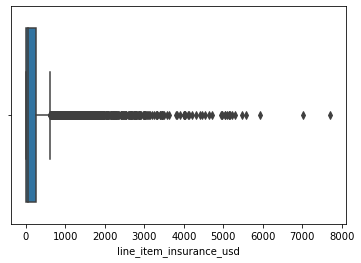

In [18]:
ax = sns.boxplot(x=supply_df['line_item_insurance_usd'])

In [19]:
supply_df['line_item_insurance_usd'].describe()

count    10037.000000
mean       240.117626
std        500.190568
min          0.000000
25%          6.510000
50%         47.040000
75%        252.400000
max       7708.440000
Name: line_item_insurance_usd, dtype: float64

### Use Median as the imputation number for 'line_item_insurance_usd'

In [20]:
supply_df['line_item_insurance_usd'] = supply_df['line_item_insurance_usd'].fillna(47.04)

In [21]:
supply_df.isnull().sum() 

id                              0
project_code                    0
pq                              0
po_so                           0
asn_dn                          0
country                         0
managed_by                      0
fulfill_via                     0
vendor_inco_term                0
shipment_mode                   0
pq_first_sent_to_client_date    0
po_sent_to_vendor_date          0
scheduled_delivery_date         0
delivered_to_client_date        0
delivery_recorded_date          0
product_group                   0
sub_classification              0
vendor                          0
item_description                0
molecule_test_type              0
brand                           0
dosage_form                     0
unit_of_measure_per_pack        0
line_item_quantity              0
line_item_value                 0
pack_price                      0
unit_price                      0
manufacturing_site              0
first_line_designation          0
weight_kilogra

- ### <font color = blue>Dealing with missclassified features.</font>

In [22]:
#pq date and po date
supply_df[['pq_first_sent_to_client_date','po_sent_to_vendor_date']].describe()

,pq_first_sent_to_client_date,po_sent_to_vendor_date
count,10324,10324
unique,765,897
top,Pre-PQ Process,N/A - From RDC
freq,2476,5404


In [23]:
supply_df['pq_first_sent_to_client_date'].value_counts()

Pre-PQ Process       2476
9/11/2014             205
Date Not Captured     205
7/11/2013             173
4/30/2014             123
                     ... 
7/29/2010               1
10/3/2011               1
12/17/2013              1
2/5/2015                1
8/29/2013               1
Name: pq_first_sent_to_client_date, Length: 765, dtype: int64

In [24]:
supply_df['po_sent_to_vendor_date'].value_counts()

N/A - From RDC       5404
Date Not Captured     328
8/27/2014              80
3/19/2010              78
8/29/2014              76
                     ... 
4/20/2012               1
8/27/2007               1
10/2/2007               1
3/21/2008               1
8/29/2012               1
Name: po_sent_to_vendor_date, Length: 897, dtype: int64

- These two variables both contains datetime type data, so there exists something wrong with the data type classification.
- For 'pq_first_sent_to_client_date', 'Pre-PQ Process' means the observation occurred before the  Purchase Quotation Process (2019),  'Date Not Captured' means missing values.
- For 'po_sent_to_vendor_date', 'N/A - From RDC' means the observation was not from Regional Delivery Center,  'Date Not Captured' means missing values.
### As the quantity of missing values is too large, and we already have enough datetime data for estimating delay, so that this two columns are decided to be removed.

In [25]:
clean_df = supply_df.drop('pq_first_sent_to_client_date', 1)
clean_df = clean_df.drop('po_sent_to_vendor_date', 1)

/tmp/ipykernel_12680/539672488.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  clean_df = supply_df.drop('pq_first_sent_to_client_date', 1)
/tmp/ipykernel_12680/539672488.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  clean_df = clean_df.drop('po_sent_to_vendor_date', 1)


In [26]:
clean_df.shape

(10324, 31)

In [27]:
#Weight and Freight Cost
clean_df['weight_kilograms'].value_counts()[:10]

Weight Captured Separately    1507
2                               29
6                               26
1                               23
5                               20
60                              20
4                               19
3                               18
39                              17
9                               17
Name: weight_kilograms, dtype: int64

In [28]:
clean_df['weight_kilograms'].value_counts()

Weight Captured Separately    1507
2                               29
6                               26
1                               23
5                               20
                              ... 
1727                             1
4038                             1
1930                             1
4382                             1
1392                             1
Name: weight_kilograms, Length: 4688, dtype: int64

In [29]:
clean_df['freight_cost_usd'].value_counts()[:10]

Freight Included in Commodity Cost    1442
Invoiced Separately                    239
9736.1                                  36
6147.18                                 27
See DN-304 (ID#:10589)                  16
7445.8                                  16
13398.06                                16
9341.49                                 15
See ASN-32231 (ID#:13648)               14
See ASN-31750 (ID#:19272)               14
Name: freight_cost_usd, dtype: int64

In [30]:
clean_df['freight_cost_usd'].value_counts()

Freight Included in Commodity Cost    1442
Invoiced Separately                    239
9736.1                                  36
6147.18                                 27
See DN-304 (ID#:10589)                  16
                                      ... 
12793.7                                  1
35499.58                                 1
1949.64                                  1
569.11                                   1
See DN-4282 (ID#:83919)                  1
Name: freight_cost_usd, Length: 6733, dtype: int64

- For 'freight_cost_usd', the most frequent value is 'Freight Included in Commodity Cost', and the second most frequent value is 'Invoiced Separately'. Also, many references like 'See DN-304 (ID#:10589)' are included instead of amount.
- For 'weight_kilograms', most observations are 'Weight Captured Separately'.

In [31]:
#Estimate Weight Value
bundled_itms =clean_df.groupby('asn_dn').filter(lambda x: len(x)>1)
unbundled_itms = clean_df.groupby('asn_dn').filter(lambda x: len(x)==1)

In [32]:
sep_weight_bundled = bundled_itms[bundled_itms.weight_kilograms== 'Weight Captured Separately']# Find those with weight captured separately
sep_weight_bundled.shape
sep_weight_single = unbundled_itms[unbundled_itms.weight_kilograms== 'Weight Captured Separately']
sep_weight_single.shape

(465, 31)

In [33]:
# Seperate out the single items
single_itms = unbundled_itms.drop(list(sep_weight_single.index),axis=0)
single_itms.shape

(5115, 31)

<AxesSubplot:>

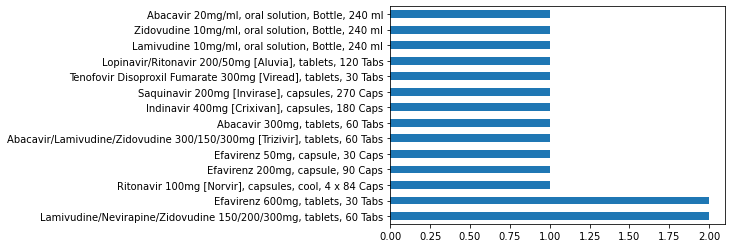

In [34]:
clean_df[clean_df['weight_kilograms'] == 'See DN-304 (ID#:10589)']['item_description'].value_counts().plot(kind='barh')

<AxesSubplot:>

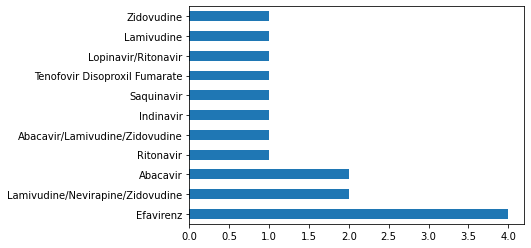

In [35]:
clean_df[clean_df['weight_kilograms'] == 'See DN-304 (ID#:10589)']['molecule_test_type'].value_counts().plot(kind='barh')

<AxesSubplot:>

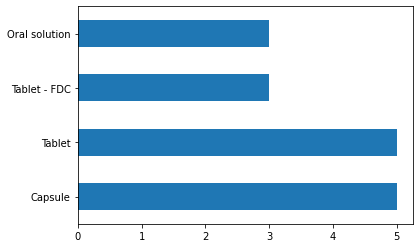

In [36]:
clean_df[clean_df['weight_kilograms'] == 'See DN-304 (ID#:10589)']['dosage_form'].value_counts().plot(kind='barh')

In [37]:
w_lkup = single_itms[['item_description','weight_kilograms','molecule_test_type', 'dosage_form']]
w_lkup['weight_kilograms'] = pd.to_numeric(w_lkup.weight_kilograms)
w_lkup['line_item_quantity'] = clean_df.loc[list(w_lkup.index),:]['line_item_quantity']
w_lkup['unit_of_measure_per_pack'] = clean_df.loc[list(w_lkup.index),:]['unit_of_measure_per_pack']
w_lkup['itm_weight'] = w_lkup.weight_kilograms/w_lkup.line_item_quantity

/tmp/ipykernel_12680/2902539339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_lkup['weight_kilograms'] = pd.to_numeric(w_lkup.weight_kilograms)
/tmp/ipykernel_12680/2902539339.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_lkup['line_item_quantity'] = clean_df.loc[list(w_lkup.index),:]['line_item_quantity']
/tmp/ipykernel_12680/2902539339.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [38]:
#Calculate the mean of total weight by item, test type and dosage form.
w_lkup_itm = w_lkup.groupby('item_description').mean().reset_index()[['item_description', 'itm_weight']]
w_lkup_mol = w_lkup.groupby('molecule_test_type').mean().reset_index()[['molecule_test_type', 'itm_weight']]
w_lkup_dos = w_lkup.groupby('dosage_form').mean().reset_index()[['dosage_form', 'itm_weight']]

merge_itm = pd.merge(clean_df, w_lkup_itm, how='left', left_on='item_description', right_on='item_description')
merge_mol = pd.merge(merge_itm, w_lkup_mol, how='left', left_on='molecule_test_type', right_on='molecule_test_type')
merge_dos = pd.merge(merge_mol, w_lkup_dos, how='left', left_on='dosage_form', right_on='dosage_form')
print(merge_itm.shape, merge_mol.shape, merge_dos.shape)

(10324, 32) (10324, 33) (10324, 34)


In [39]:
merge_itm.head()

,id,project_code,pq,po_so,asn_dn,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,...,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,dosage,line_item_insurance_usd,itm_weight
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,0,47.04,0.684211
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,6200.0,6.20,0.03,"Aurobindo Unit III, India",True,358,4521.5,10mg/ml,47.04,0.368830
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,True,171,1653.78,0,47.04,21.342304
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",True,1855,16007.06,150mg,47.04,0.060034
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,121600.0,3.20,0.05,"Aurobindo Unit III, India",True,7590,45450.08,30mg,47.04,0.083157


In [40]:
merge_mol.head()

,id,project_code,pq,po_so,asn_dn,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,...,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,dosage,line_item_insurance_usd,itm_weight_x,itm_weight_y
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,29.00,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,0,47.04,0.684211,0.684211
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,6.20,0.03,"Aurobindo Unit III, India",True,358,4521.5,10mg/ml,47.04,0.368830,0.161855
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,True,171,1653.78,0,47.04,21.342304,21.342304
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,3.99,0.07,"Ranbaxy, Paonta Shahib, India",True,1855,16007.06,150mg,47.04,0.060034,0.130848
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,3.20,0.05,"Aurobindo Unit III, India",True,7590,45450.08,30mg,47.04,0.083157,0.087215


In [41]:
merge_dos.head()

,id,project_code,pq,po_so,asn_dn,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,...,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,dosage,line_item_insurance_usd,itm_weight_x,itm_weight_y,itm_weight
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,0,47.04,0.684211,0.684211,9.125038
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,0.03,"Aurobindo Unit III, India",True,358,4521.5,10mg/ml,47.04,0.368830,0.161855,0.359953
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,0.80,ABBVIE GmbH & Co.KG Wiesbaden,True,171,1653.78,0,47.04,21.342304,21.342304,9.125038
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,0.07,"Ranbaxy, Paonta Shahib, India",True,1855,16007.06,150mg,47.04,0.060034,0.130848,0.282370
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,0.05,"Aurobindo Unit III, India",True,7590,45450.08,30mg,47.04,0.083157,0.087215,0.418782


In [42]:
w1 = merge_dos.itm_weight_x.notnull()
merge_dos['itm_weight_new'] =merge_dos.itm_weight_x.where(w1,merge_dos.itm_weight_y)
w2 = merge_dos.itm_weight_new.notnull()
merge_dos['itm_weight_new'] = merge_dos.itm_weight_new.where(w2,merge_dos.itm_weight)

In [43]:
clean_df['weight_calculated'] = clean_df['line_item_quantity']*merge_dos['itm_weight_new']
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        10324 non-null  int64         
 1   project_code              10324 non-null  object        
 2   pq                        10324 non-null  object        
 3   po_so                     10324 non-null  object        
 4   asn_dn                    10324 non-null  object        
 5   country                   10324 non-null  object        
 6   managed_by                10324 non-null  object        
 7   fulfill_via               10324 non-null  object        
 8   vendor_inco_term          10324 non-null  object        
 9   shipment_mode             10324 non-null  object        
 10  scheduled_delivery_date   10324 non-null  datetime64[ns]
 11  delivered_to_client_date  10324 non-null  datetime64[ns]
 12  delivery_recorded_

### Process of estimating  the weight
- Dividing bundled goods from unbundled goods
- Recognize single items: unbundled items whose weight were not captured separately
- Calculate the mean of weight per single items by item description, test type and dosage form, then merge into a new combined dataset
- Calculate the new item weight base on the new combined dataset: First base on the estimation mean grouped by item description to calculate, then test type, and then dosage form.
- Calculate the estimated total weight of each observation: Multiply new item weight by item quantity.

In [44]:
#Estimate Freight Value
clean_df['freight_cost_usd'].value_counts()[:10]

Freight Included in Commodity Cost    1442
Invoiced Separately                    239
9736.1                                  36
6147.18                                 27
See DN-304 (ID#:10589)                  16
7445.8                                  16
13398.06                                16
9341.49                                 15
See ASN-32231 (ID#:13648)               14
See ASN-31750 (ID#:19272)               14
Name: freight_cost_usd, dtype: int64

In [45]:
# Freight with Invoiced Seperately
sep_freight_cost_bundled = bundled_itms[bundled_itms.freight_cost_usd== 'Invoiced Separately']
print(sep_freight_cost_bundled.shape)
sep_freight_cost_single = unbundled_itms[unbundled_itms.freight_cost_usd== 'Invoiced Separately']
print(sep_freight_cost_single.shape)
# Freight Included in Commodity Costs
included_freight_cost_bundled = bundled_itms[bundled_itms.freight_cost_usd== 'Freight Included in Commodity Cost']
print(included_freight_cost_bundled.shape)
included_freight_cost_single = unbundled_itms[unbundled_itms.freight_cost_usd== 'Freight Included in Commodity Cost']
print(included_freight_cost_single.shape)

(58, 31)
(181, 31)
(1000, 31)
(442, 31)


In [46]:
# Seperate out the single items
single_itms_fc = single_itms.drop(list(single_itms[single_itms.freight_cost_usd=='Freight Included in Commodity Cost'].index),axis=0)
single_itms_fc.shape

(4942, 31)

In [47]:
f_lkup = single_itms_fc[['item_description','freight_cost_usd','molecule_test_type', 'dosage_form']]
f_lkup['freight_cost_usd'] = pd.to_numeric(f_lkup.freight_cost_usd)
f_lkup['weight_calculated'] = clean_df.loc[list(f_lkup.index),:]['weight_calculated']
f_lkup['itm_freight_cost'] = f_lkup.freight_cost_usd/f_lkup.weight_calculated

/tmp/ipykernel_12680/2632902651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_lkup['freight_cost_usd'] = pd.to_numeric(f_lkup.freight_cost_usd)
/tmp/ipykernel_12680/2632902651.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_lkup['weight_calculated'] = clean_df.loc[list(f_lkup.index),:]['weight_calculated']
/tmp/ipykernel_12680/2632902651.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [48]:
merge_dos.drop(['itm_weight_new'], axis=1, inplace=True)

In [49]:
#Calculate the mean of total freight by item, test type and dosage form.
f_lkup_itm = f_lkup.groupby('item_description').mean().reset_index()[['item_description', 'itm_freight_cost']]
f_lkup_mol = f_lkup.groupby('molecule_test_type').mean().reset_index()[['molecule_test_type', 'itm_freight_cost']]
f_lkup_dos = f_lkup.groupby('dosage_form').mean().reset_index()[['dosage_form', 'itm_freight_cost']]

fmerge_itm = pd.merge(clean_df, f_lkup_itm, how='left', left_on='item_description', right_on='item_description')
fmerge_mol = pd.merge(fmerge_itm, f_lkup_mol, how='left', left_on='molecule_test_type', right_on='molecule_test_type')
fmerge_dos = pd.merge(fmerge_mol, f_lkup_dos, how='left', left_on='dosage_form', right_on='dosage_form')
print(fmerge_itm.shape, fmerge_mol.shape, fmerge_dos.shape)

(10324, 33) (10324, 34) (10324, 35)


In [50]:
fmerge_itm.head()

,id,project_code,pq,po_so,asn_dn,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,...,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,dosage,line_item_insurance_usd,weight_calculated,itm_freight_cost
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,29.00,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,0,47.04,13.000000,63.071923
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,6.20,0.03,"Aurobindo Unit III, India",True,358,4521.5,10mg/ml,47.04,368.830071,6.332293
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,True,171,1653.78,0,47.04,10671.152042,8.694341
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,3.99,0.07,"Ranbaxy, Paonta Shahib, India",True,1855,16007.06,150mg,47.04,1916.285060,446.729715
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,3.20,0.05,"Aurobindo Unit III, India",True,7590,45450.08,30mg,47.04,3159.972544,23.344251


In [51]:
fmerge_mol.head()

,id,project_code,pq,po_so,asn_dn,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,...,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,dosage,line_item_insurance_usd,weight_calculated,itm_freight_cost_x,itm_freight_cost_y
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,0,47.04,13.000000,63.071923,63.071923
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,0.03,"Aurobindo Unit III, India",True,358,4521.5,10mg/ml,47.04,368.830071,6.332293,9.038917
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,0.80,ABBVIE GmbH & Co.KG Wiesbaden,True,171,1653.78,0,47.04,10671.152042,8.694341,8.694341
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,0.07,"Ranbaxy, Paonta Shahib, India",True,1855,16007.06,150mg,47.04,1916.285060,446.729715,341.588896
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,0.05,"Aurobindo Unit III, India",True,7590,45450.08,30mg,47.04,3159.972544,23.344251,47.677485


In [52]:
fmerge_dos.head()

,id,project_code,pq,po_so,asn_dn,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,...,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,dosage,line_item_insurance_usd,weight_calculated,itm_freight_cost_x,itm_freight_cost_y,itm_freight_cost
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,Ranbaxy Fine Chemicals LTD,True,13,780.34,0,47.04,13.000000,63.071923,63.071923,24.792792
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,"Aurobindo Unit III, India",True,358,4521.5,10mg/ml,47.04,368.830071,6.332293,9.038917,4.713003
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,ABBVIE GmbH & Co.KG Wiesbaden,True,171,1653.78,0,47.04,10671.152042,8.694341,8.694341,24.792792
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,"Ranbaxy, Paonta Shahib, India",True,1855,16007.06,150mg,47.04,1916.285060,446.729715,341.588896,68.038356
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,"Aurobindo Unit III, India",True,7590,45450.08,30mg,47.04,3159.972544,23.344251,47.677485,40.757513


In [53]:
w1 = fmerge_dos.itm_freight_cost_x.notnull()
fmerge_dos['itm_freight_cost_new'] = fmerge_dos.itm_freight_cost_y.where(w1,fmerge_dos.itm_freight_cost)
w2 = fmerge_dos.itm_freight_cost_new.notnull()
fmerge_dos['itm_freight_cost_new'] = fmerge_dos.itm_freight_cost_new.where(w2,fmerge_dos.itm_freight_cost)

In [54]:
#### Now Calculate the real freight_cost of items and move it to the float dictionary
clean_df['freight_cost_calculated'] = clean_df['weight_calculated']*fmerge_dos['itm_freight_cost_new']
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        10324 non-null  int64         
 1   project_code              10324 non-null  object        
 2   pq                        10324 non-null  object        
 3   po_so                     10324 non-null  object        
 4   asn_dn                    10324 non-null  object        
 5   country                   10324 non-null  object        
 6   managed_by                10324 non-null  object        
 7   fulfill_via               10324 non-null  object        
 8   vendor_inco_term          10324 non-null  object        
 9   shipment_mode             10324 non-null  object        
 10  scheduled_delivery_date   10324 non-null  datetime64[ns]
 11  delivered_to_client_date  10324 non-null  datetime64[ns]
 12  delivery_recorded_

In [55]:
clean_df.freight_cost_calculated.isnull().sum()

0

In [56]:
clean_df.weight_calculated.isnull().sum()

0

### Process of estimating  the freight cost
- Recognize freight which invoiced seperately and freight included in commodity costs from bundled items and unbundled items.
- Seperate out single items
- Calculate the mean of freight cost per single items by item description, test type and dosage form, then merge into a new combined dataset
- Calculate the new item freight cost base on the new combined dataset: First base on the estimation mean grouped by item description to calculate, then test type, and then dosage form.
- Calculate the estimated total freight cost of each observation: Multiply calculated weight by item quantity.

## <font color = blue>Feature Engineering</font>

- ### <font color = blue>Deal with Datetime data</font>

In [57]:
clean_df.head()

,id,project_code,pq,po_so,asn_dn,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,...,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,dosage,line_item_insurance_usd,weight_calculated,freight_cost_calculated
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,29.00,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,0,47.04,13.000000,819.935000
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,6.20,0.03,"Aurobindo Unit III, India",True,358,4521.5,10mg/ml,47.04,368.830071,3333.824568
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,True,171,1653.78,0,47.04,10671.152042,92778.636389
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,3.99,0.07,"Ranbaxy, Paonta Shahib, India",True,1855,16007.06,150mg,47.04,1916.285060,654581.698805
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,3.20,0.05,"Aurobindo Unit III, India",True,7590,45450.08,30mg,47.04,3159.972544,150659.542700


In [58]:
complete_df = clean_df

In [59]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        10324 non-null  int64         
 1   project_code              10324 non-null  object        
 2   pq                        10324 non-null  object        
 3   po_so                     10324 non-null  object        
 4   asn_dn                    10324 non-null  object        
 5   country                   10324 non-null  object        
 6   managed_by                10324 non-null  object        
 7   fulfill_via               10324 non-null  object        
 8   vendor_inco_term          10324 non-null  object        
 9   shipment_mode             10324 non-null  object        
 10  scheduled_delivery_date   10324 non-null  datetime64[ns]
 11  delivered_to_client_date  10324 non-null  datetime64[ns]
 12  delivery_recorded_

In [60]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        10324 non-null  int64         
 1   project_code              10324 non-null  object        
 2   pq                        10324 non-null  object        
 3   po_so                     10324 non-null  object        
 4   asn_dn                    10324 non-null  object        
 5   country                   10324 non-null  object        
 6   managed_by                10324 non-null  object        
 7   fulfill_via               10324 non-null  object        
 8   vendor_inco_term          10324 non-null  object        
 9   shipment_mode             10324 non-null  object        
 10  scheduled_delivery_date   10324 non-null  datetime64[ns]
 11  delivered_to_client_date  10324 non-null  datetime64[ns]
 12  delivery_recorded_

In [61]:
# Split datetime columns into specific month, day and year columns.
columns = ['scheduled_delivery_date','delivered_to_client_date','delivery_recorded_date']
y_list = [list(complete_df[c].dt.year) for c in columns]
m_list = [list(complete_df[c].dt.month) for c in columns]
d_list = [list(complete_df[c].dt.day) for c in columns]

date_list=[y_list,m_list,d_list]
date_suffix = ['y','m','d']

for c in columns:
    j=columns.index(c)
    for i in range(len(date_list)):
        name = str(c)+str("_")+str(date_suffix[i])
        complete_df[name] = pd.Categorical(date_list[i][j]) 
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          10324 non-null  int64         
 1   project_code                10324 non-null  object        
 2   pq                          10324 non-null  object        
 3   po_so                       10324 non-null  object        
 4   asn_dn                      10324 non-null  object        
 5   country                     10324 non-null  object        
 6   managed_by                  10324 non-null  object        
 7   fulfill_via                 10324 non-null  object        
 8   vendor_inco_term            10324 non-null  object        
 9   shipment_mode               10324 non-null  object        
 10  scheduled_delivery_date     10324 non-null  datetime64[ns]
 11  delivered_to_client_date    10324 non-null  datetime64

In [62]:
complete_df.scheduled_delivery_date_y.value_counts()

2014    1528
2012    1273
2013    1272
2009    1253
2010    1204
2008    1029
2015    1017
2011    1011
2007     672
2006      65
Name: scheduled_delivery_date_y, dtype: int64

In [63]:
#Split datetime columns into businessday, monthend and quarterly features
weekday_list = [list(complete_df[c].dt.weekday) for c in columns]
weekofyear_list = [list(complete_df[c].dt.weekofyear) for c in columns]
quarter_list = [list(complete_df[c].dt.quarter) for c in columns]

date_list=[weekday_list,weekofyear_list,quarter_list]
date_suffix = ['weekday','weekofyear','quarter']

for c in columns:
    j=columns.index(c)
    for i in range(len(date_list)):
        name = str(c)+str("_")+str(date_suffix[i])
        complete_df[name] = pd.Categorical(date_list[i][j]) 
complete_df.info()

/tmp/ipykernel_12680/1678083484.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  weekofyear_list = [list(complete_df[c].dt.weekofyear) for c in columns]
/tmp/ipykernel_12680/1678083484.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  weekofyear_list = [list(complete_df[c].dt.weekofyear) for c in columns]
/tmp/ipykernel_12680/1678083484.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  weekofyear_list = [list(complete_df[c].dt.weekofyear) for c in columns]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 51 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   id                                   10324 non-null  int64         
 1   project_code                         10324 non-null  object        
 2   pq                                   10324 non-null  object        
 3   po_so                                10324 non-null  object        
 4   asn_dn                               10324 non-null  object        
 5   country                              10324 non-null  object        
 6   managed_by                           10324 non-null  object        
 7   fulfill_via                          10324 non-null  object        
 8   vendor_inco_term                     10324 non-null  object        
 9   shipment_mode                        10324 non-null  object        
 10  scheduled_

In [64]:
complete_df.scheduled_delivery_date_weekday.value_counts()

4    2238
1    2190
0    2006
3    1791
2    1743
5     214
6     142
Name: scheduled_delivery_date_weekday, dtype: int64

In [65]:
complete_df.scheduled_delivery_date_weekofyear.value_counts()

35    468
44    296
5     294
27    278
31    273
11    272
13    263
16    260
22    259
26    256
14    241
9     234
48    233
18    233
40    224
28    219
38    216
39    214
25    207
17    206
20    205
34    203
23    195
47    182
45    181
36    181
6     181
30    180
42    179
50    179
8     179
49    178
15    177
19    169
29    167
12    166
33    164
51    162
43    162
24    159
4     157
32    156
37    152
10    151
2     145
7     138
21    135
41    132
46    125
3     124
1     110
52     82
53     22
Name: scheduled_delivery_date_weekofyear, dtype: int64

In [66]:
complete_df.scheduled_delivery_date_quarter.value_counts()

3    2882
2    2719
1    2436
4    2287
Name: scheduled_delivery_date_quarter, dtype: int64

- ### <font color = blue>Deal with Numerical Data</font>

In [67]:
#Deal with Numerical Data
entity = ['country','manufacturing_site','vendor','molecule_test_type','brand']
stats_dfs = [None,None,None,None,None]
n_measures = ['line_item_quantity', 'line_item_value', 'Line_Item_Insurance_USD'
                , 'estimated_weight', 'estimated_freight_cost']

joins =[None,None,None,None,None]

In [68]:
for i in range(len(entity)):
    stats_dfs[i] = complete_df.groupby(
        [entity[i], 'scheduled_delivery_date_y']).agg(['sum', 'count', 'mean'])
    stats_dfs[i].columns = [entity[i]+"_"+str(x[0]+x[1]).split("_")[-1] for x in stats_dfs[i].columns]
    stats_dfs[i].reset_index(inplace=True)    

print([x.columns for x in stats_dfs])

for i in range(len(entity)):
    print(i)
    a= complete_df[entity+['scheduled_delivery_date_y']].copy()
    joins[i] = pd.merge(a, stats_dfs[i],left_on=[entity[i],'scheduled_delivery_date_y'], right_on=[entity[i],'scheduled_delivery_date_y'])

/tmp/ipykernel_12680/654762639.py:2: FutureWarning: ['project_code', 'pq', 'po_so', 'asn_dn', 'managed_by', 'fulfill_via', 'vendor_inco_term', 'shipment_mode', 'scheduled_delivery_date', 'delivered_to_client_date', 'delivery_recorded_date', 'product_group', 'sub_classification', 'vendor', 'item_description', 'molecule_test_type', 'brand', 'dosage_form', 'manufacturing_site', 'weight_kilograms', 'freight_cost_usd', 'dosage', 'scheduled_delivery_date_m', 'scheduled_delivery_date_d', 'delivered_to_client_date_y', 'delivered_to_client_date_m', 'delivered_to_client_date_d', 'delivery_recorded_date_y', 'delivery_recorded_date_m', 'delivery_recorded_date_d', 'scheduled_delivery_date_weekday', 'scheduled_delivery_date_weekofyear', 'scheduled_delivery_date_quarter', 'delivered_to_client_date_weekday', 'delivered_to_client_date_weekofyear', 'delivered_to_client_date_quarter', 'delivery_recorded_date_weekday', 'delivery_recorded_date_weekofyear', 'delivery_recorded_date_quarter'] did not aggregat

[Index(['country', 'scheduled_delivery_date_y', 'country_idsum',
       'country_idcount', 'country_idmean', 'country_packsum',
       'country_packcount', 'country_packmean', 'country_quantitysum',
       'country_quantitycount', 'country_quantitymean', 'country_valuesum',
       'country_valuecount', 'country_valuemean', 'country_pricesum',
       'country_pricecount', 'country_pricemean', 'country_pricesum',
       'country_pricecount', 'country_pricemean', 'country_designationsum',
       'country_designationcount', 'country_designationmean', 'country_usdsum',
       'country_usdcount', 'country_usdmean', 'country_calculatedsum',
       'country_calculatedcount', 'country_calculatedmean',
       'country_calculatedsum', 'country_calculatedcount',
       'country_calculatedmean'],
      dtype='object'), Index(['manufacturing_site', 'scheduled_delivery_date_y',
       'manufacturing_site_idsum', 'manufacturing_site_idcount',
       'manufacturing_site_idmean', 'manufacturing_site_pac

/tmp/ipykernel_12680/654762639.py:2: FutureWarning: ['project_code', 'pq', 'po_so', 'asn_dn', 'country', 'managed_by', 'fulfill_via', 'vendor_inco_term', 'shipment_mode', 'scheduled_delivery_date', 'delivered_to_client_date', 'delivery_recorded_date', 'product_group', 'sub_classification', 'vendor', 'item_description', 'molecule_test_type', 'dosage_form', 'manufacturing_site', 'weight_kilograms', 'freight_cost_usd', 'dosage', 'scheduled_delivery_date_m', 'scheduled_delivery_date_d', 'delivered_to_client_date_y', 'delivered_to_client_date_m', 'delivered_to_client_date_d', 'delivery_recorded_date_y', 'delivery_recorded_date_m', 'delivery_recorded_date_d', 'scheduled_delivery_date_weekday', 'scheduled_delivery_date_weekofyear', 'scheduled_delivery_date_quarter', 'delivered_to_client_date_weekday', 'delivered_to_client_date_weekofyear', 'delivered_to_client_date_quarter', 'delivery_recorded_date_weekday', 'delivery_recorded_date_weekofyear', 'delivery_recorded_date_quarter'] did not aggreg

In [69]:
joined_df = pd.concat(joins, axis=1)
print(joined_df.shape)
joined_df=joined_df.drop(entity+['scheduled_delivery_date_y'], axis=1)
print(joined_df.shape)

(10324, 180)
(10324, 150)


In [70]:
country_df, factory_df, vendor_df, molecule_test_df, brand_df = joins #Merge for each entity

In [71]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10324 entries, 0 to 10323
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   country                    10324 non-null  object  
 1   manufacturing_site         10324 non-null  object  
 2   vendor                     10324 non-null  object  
 3   molecule_test_type         10324 non-null  object  
 4   brand                      10324 non-null  object  
 5   scheduled_delivery_date_y  10324 non-null  category
 6   country_idsum              10324 non-null  int64   
 7   country_idcount            10324 non-null  int64   
 8   country_idmean             10324 non-null  float64 
 9   country_packsum            10324 non-null  int64   
 10  country_packcount          10324 non-null  int64   
 11  country_packmean           10324 non-null  float64 
 12  country_quantitysum        10324 non-null  int64   
 13  country_quantitycount      1032

In [72]:
country_df.head(3).transpose()


,0,1,2
country,Côte d'Ivoire,Côte d'Ivoire,Côte d'Ivoire
manufacturing_site,Ranbaxy Fine Chemicals LTD,ABBVIE GmbH & Co.KG Wiesbaden,Bio-Rad Laboratories
vendor,RANBAXY Fine Chemicals LTD.,Abbott GmbH & Co. KG,BIO-RAD LABORATORIES (FRANCE)
molecule_test_type,"HIV, Reveal G3 Rapid HIV-1 Antibody Test","HIV 1/2, Determine Complete HIV Kit","HIV, Genie II HIV-1/HIV-2 Kit"
brand,Reveal,Determine,Genie
scheduled_delivery_date_y,2006,2006,2006
country_idsum,61792,61792,61792
country_idcount,14,14,14
country_idmean,4413.714286,4413.714286,4413.714286
country_packsum,855,855,855


- ### <font color = blue>Deal with Categorical Data</font>

In [73]:
#Deal with categorical data
# If the wight was captured seperately
complete_df['weight_captured_seperately'] = "No"
sep_idx = list(sep_weight_single.index) + list(sep_weight_bundled.index)
complete_df.loc[sep_idx, 'weight_captured_seperately'] = "Yes"
complete_df['weight_captured_seperately'].value_counts()

No     8817
Yes    1507
Name: weight_captured_seperately, dtype: int64

In [74]:
# If the freight cost invoiced seperately
complete_df['freight_invoiced_seperately'] = "No"
is_idx = list(complete_df[complete_df.freight_cost_usd=='Invoiced Separately'].index)
complete_df.loc[is_idx, 'freight_invoiced_seperately'] = "Yes"
complete_df['freight_invoiced_seperately'].value_counts()

No     10085
Yes      239
Name: freight_invoiced_seperately, dtype: int64

In [75]:
# If the freight included in commodity cost
complete_df['freight_in_commodity_cost'] = "No"
ic_idx = list(complete_df[complete_df.freight_cost_usd=='Freight Included in Commodity Cost'].index)
complete_df.loc[ic_idx, 'freight_in_commodity_cost'] = "Yes"
complete_df['freight_in_commodity_cost'].value_counts()

No     8882
Yes    1442
Name: freight_in_commodity_cost, dtype: int64

- ### <font color = blue>Creat Target Labels</font>

In [76]:
#Create label: delayed or not
complete_df['delivery_delay_time'] = complete_df.delivered_to_client_date.copy() - complete_df.scheduled_delivery_date.copy()
complete_df['delivery_delay_time'].describe()

count                          10324
mean     -7 days +23:26:06.369624177
std       27 days 05:36:26.499569268
min              -372 days +00:00:00
25%                -3 days +00:00:00
50%                  0 days 00:00:00
75%                  0 days 00:00:00
max                192 days 00:00:00
Name: delivery_delay_time, dtype: object

In [77]:
complete_df['delayed'] = complete_df['delivery_delay_time']>'0 days'
complete_df.delayed.value_counts()

False    9138
True     1186
Name: delayed, dtype: int64

- ### <font color = blue>Other External Features</font>

### World Fragile State Index: represents a country's stability.
https://fragilestatesindex.org/excel/

### World Logistic Performance Index: It measures performance along the logistics supply chain within a country.
https://lpi.worldbank.org/international/global?sort=asc&order=Infrastructure

In [83]:
fsi_lpi_df = pd.read_csv('./Data/lpi_fsi.csv')#From 2006 to 2017
fsi_lpi_df.rename(columns={'year':'delivered_to_client_date_y'}, inplace=True)
fsi_lpi_df["country"] = fsi_lpi_df["country"].replace(["C?te d'Ivoire"],"Côte d'Ivoire")

fsi_lpi_df.head()

,fsi,delivered_to_client_date_y,country,customs,infra,intl_ship,logistic_qlty,lpi,timeliness,track_trace
0,112.3,2006,Sudan,2.357140,2.357140,2.666670,2.833330,2.710802,3.166670,2.916670
1,110.1,2006,"Congo, DRC",2.579769,2.599128,2.736892,2.727269,2.764237,3.196429,2.764198
2,109.2,2006,Côte d'Ivoire,2.222220,2.222220,2.125000,2.375000,2.361346,3.250000,2.000000
3,109.0,2006,Iraq,2.579769,2.599128,2.736892,2.727269,2.764237,3.196429,2.764198
4,108.9,2006,Zimbabwe,1.923080,1.866670,2.266670,2.214290,2.286277,2.846150,2.642860


In [84]:
fsi_lpi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1921 entries, 0 to 1920
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   fsi                         1921 non-null   float64
 1   delivered_to_client_date_y  1921 non-null   int64  
 2   country                     1921 non-null   object 
 3   customs                     1710 non-null   float64
 4   infra                       1710 non-null   float64
 5   intl_ship                   1710 non-null   float64
 6   logistic_qlty               1710 non-null   float64
 7   lpi                         1710 non-null   float64
 8   timeliness                  1710 non-null   float64
 9   track_trace                 1710 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 150.2+ KB


In [85]:
fsi_lpi_df.isnull().sum()

fsi                             0
delivered_to_client_date_y      0
country                         0
customs                       211
infra                         211
intl_ship                     211
logistic_qlty                 211
lpi                           211
timeliness                    211
track_trace                   211
dtype: int64

In [86]:
fsi_lpi_df.delivered_to_client_date_y.value_counts()

2012    178
2013    178
2014    178
2015    178
2016    178
2007    177
2008    177
2009    177
2010    177
2011    177
2006    146
Name: delivered_to_client_date_y, dtype: int64

In [87]:
fsi_lpi_df.country.value_counts()

Sudan              11
Estonia            11
Libya              11
Botswana           11
Jamaica            11
                   ..
Swaziland          10
Solomon Islands    10
Congo Republic     10
Timor-Leste        10
South Sudan         5
Name: country, Length: 178, dtype: int64

- ### <font color = blue>Add Location Information Features</font>

In [88]:
factory_map_df = pd.read_csv('./Data/factory_map.csv', encoding="ISO-8859-1")
factory_map_df.head()

,factory_address,origin_country,origin_continent,name
0,"W-22, Okhla Industrial Area Phase-II, Okhla In...",India,Asia,Ranbaxy Fine Chemicals LTD
1,"Unit 3, UNIT- 9, Bhubaneswar, Odisha 751001, I...",India,Asia,"Aurobindo Unit III, India"
2,"Mainzer Str. 81, 65189 Wiesbaden, Germany",Germany,Europe,ABBVIE GmbH & Co.KG Wiesbaden
3,"Ranbaxy Rd, Paonta Sahib, Himachal Pradesh 173...",India,Asia,"Ranbaxy, Paonta Shahib, India"
4,"54-68 Ferndell St, South Granville NSW 2142, A...",Australia,Australia,MSD South Granville Australia


In [89]:
factory_map_df.origin_country.value_counts()

India             24
United States     19
United Kingdom     9
Canada             4
Germany            4
Ireland            3
South Africa       3
France             2
Cyprus             2
Italy              2
Puerto Rico        2
Switzerland        2
Spain              2
China              2
Australia          1
Norway             1
Netherlands        1
Greece             1
South Korea        1
Thailand           1
Sweden             1
Poland             1
Name: origin_country, dtype: int64

In [90]:
factory_map_df = factory_map_df.drop(['factory_address'],axis=1)

In [91]:
factory_map_df.rename(columns={'name':'manufacturing_site'}, inplace=True)

In [92]:
factory_map_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   origin_country      88 non-null     object
 1   origin_continent    88 non-null     object
 2   manufacturing_site  88 non-null     object
dtypes: object(3)
memory usage: 2.2+ KB


In [93]:
deletelist=['weight_kilograms','freight_cost_usd']
complete_df = clean_df.drop(deletelist,axis=1)
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 54 columns):
 #   Column                               Non-Null Count  Dtype          
---  ------                               --------------  -----          
 0   id                                   10324 non-null  int64          
 1   project_code                         10324 non-null  object         
 2   pq                                   10324 non-null  object         
 3   po_so                                10324 non-null  object         
 4   asn_dn                               10324 non-null  object         
 5   country                              10324 non-null  object         
 6   managed_by                           10324 non-null  object         
 7   fulfill_via                          10324 non-null  object         
 8   vendor_inco_term                     10324 non-null  object         
 9   shipment_mode                        10324 non-null  object         
 10

- ### <font color = blue>Combine Features together</font>

In [94]:
#final_df = pd.merge(complete_df,factory_map_df,on='manufacturing_site',how='inner')
#final_df = pd.merge(final_df, fsi_lpi_df, on = ['country','delivered_to_client_date_y'], how = 'inner')
#final_df = pd.merge(final_df, fsi_lpi_df, left_on = ['origin_country','delivered_to_client_date_y'], 
#                    right_on = ['country','delivered_to_client_date_y'], how = 'inner')


In [95]:
final_df = pd.merge(complete_df,factory_map_df)
final_df = pd.merge(final_df, fsi_lpi_df, on = ['country','delivered_to_client_date_y'], how = 'left')

In [96]:
fsi_lpi_df.head()

,fsi,delivered_to_client_date_y,country,customs,infra,intl_ship,logistic_qlty,lpi,timeliness,track_trace
0,112.3,2006,Sudan,2.357140,2.357140,2.666670,2.833330,2.710802,3.166670,2.916670
1,110.1,2006,"Congo, DRC",2.579769,2.599128,2.736892,2.727269,2.764237,3.196429,2.764198
2,109.2,2006,Côte d'Ivoire,2.222220,2.222220,2.125000,2.375000,2.361346,3.250000,2.000000
3,109.0,2006,Iraq,2.579769,2.599128,2.736892,2.727269,2.764237,3.196429,2.764198
4,108.9,2006,Zimbabwe,1.923080,1.866670,2.266670,2.214290,2.286277,2.846150,2.642860


In [97]:
fsi_lpi_df.rename(columns={'fsi':'origin_fsi','country':'origin_country','customs':'origin_customs',
                           'infra':'origin_infra','intl_ship':'origin_intl_ship','logistic_qlty':'origin_logistic_qlty',
                           'lpi':'origin_lpi','timeliness':'origin_timeliness','track_trace':'origin_track_trace'}, inplace=True)
final_df = pd.merge(final_df, fsi_lpi_df,on = ['origin_country','delivered_to_client_date_y'], how = 'left')

In [98]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10324 entries, 0 to 10323
Data columns (total 72 columns):
 #   Column                               Non-Null Count  Dtype          
---  ------                               --------------  -----          
 0   id                                   10324 non-null  int64          
 1   project_code                         10324 non-null  object         
 2   pq                                   10324 non-null  object         
 3   po_so                                10324 non-null  object         
 4   asn_dn                               10324 non-null  object         
 5   country                              10324 non-null  object         
 6   managed_by                           10324 non-null  object         
 7   fulfill_via                          10324 non-null  object         
 8   vendor_inco_term                     10324 non-null  object         
 9   shipment_mode                        10324 non-null  object         
 10

In [99]:
final_df.tail()

,id,project_code,pq,po_so,asn_dn,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,...,timeliness,track_trace,origin_fsi,origin_customs,origin_infra,origin_intl_ship,origin_logistic_qlty,origin_lpi,origin_timeliness,origin_track_trace
10319,84166,102-LY-T30,FPQ-9665,SO-41900,DN-2641,Libya,PMO - US,From RDC,N/A - From RDC,Air,...,2.508929,2.37500,78.0,2.770263,2.866597,2.981828,3.136783,3.075887,3.581115,3.09405
10320,85257,102-DO-T30,FPQ-9676,SO-41880,DN-2638,Dominican Republic,PMO - US,From RDC,N/A - From RDC,Air,...,2.966711,2.48845,78.0,2.770263,2.866597,2.981828,3.136783,3.075887,3.581115,3.09405
10321,85279,114-UG-T30,FPQ-9355,SO-41593,DN-2744,Uganda,PMO - US,From RDC,N/A - From RDC,Truck,...,NaN,NaN,78.0,2.770263,2.866597,2.981828,3.136783,3.075887,3.581115,3.09405
10322,85866,102-CD-T30,FPQ-9640,SO-41850,DN-2697,"Congo, DRC",PMO - US,From RDC,N/A - From RDC,Air,...,2.381492,2.35262,78.0,2.770263,2.866597,2.981828,3.136783,3.075887,3.581115,3.09405
10323,86463,114-UG-T30,FPQ-9354,SO-41630,DN-2603,Uganda,PMO - US,From RDC,N/A - From RDC,Air,...,NaN,NaN,78.0,2.770263,2.866597,2.981828,3.136783,3.075887,3.581115,3.09405


In [1]:
#pd.set_option("display.max_rows", None)
#final_df['id'].value_counts()

In [311]:
final_df.isnull().sum() #Check the Nulls

id                                        0
project_code                              0
pq                                        0
po_so                                     0
asn_dn                                    0
country                                   0
managed_by                                0
fulfill_via                               0
vendor_inco_term                          0
shipment_mode                             0
scheduled_delivery_date                   0
delivered_to_client_date                  0
delivery_recorded_date                    0
product_group                             0
sub_classification                        0
vendor                                    0
item_description                          0
molecule_test_type                        0
brand                                     0
dosage_form                               0
unit_of_measure_per_pack                  0
line_item_quantity                        0
line_item_value                 

In [114]:
final_df[final_df['fsi'].isnull().values==True]

,id,project_code,pq,po_so,asn_dn,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,...,timeliness,track_trace,origin_fsi,origin_customs,origin_infra,origin_intl_ship,origin_logistic_qlty,origin_lpi,origin_timeliness,origin_track_trace
94,5268,105-GY-T01,Pre-PQ Process,SCMS-122,ASN-116,Guyana,PMO - US,Direct Drop,EXW,Air,...,NaN,NaN,70.4,2.691180,2.90476,3.078130,3.26563,3.070914,3.47458,3.033330
127,9269,105-GY-T01,Pre-PQ Process,SCMS-123,ASN-78,Guyana,PMO - US,Direct Drop,EXW,Air,...,NaN,NaN,70.4,2.691180,2.90476,3.078130,3.26563,3.070914,3.47458,3.033330
3184,5293,102-GY-T01,Pre-PQ Process,SCMS-225,ASN-113,Guyana,PMO - US,Direct Drop,EXW,Air,...,NaN,NaN,39.7,3.882790,4.19133,3.909840,4.20728,4.098695,4.32727,4.118640
3638,1285,102-GY-T01,Pre-PQ Process,SCMS-177,ASN-136,Guyana,PMO - US,Direct Drop,EXW,Air,...,NaN,NaN,18.6,3.818180,3.71875,3.758620,3.93103,3.913845,4.32000,3.961540
7135,4331,129-KG-T01,Pre-PQ Process,SCMS-19110,ASN-1801,Kyrgyzstan,PMO - US,Direct Drop,DDP,Air,...,NaN,NaN,32.9,3.739196,4.01539,3.789473,3.98731,3.980391,4.29017,4.111021
7141,8344,129-KG-T01,Pre-PQ Process,SCMS-19120,ASN-2356,Kyrgyzstan,PMO - US,Direct Drop,DDP,Air,...,NaN,NaN,32.9,3.739196,4.01539,3.789473,3.98731,3.980391,4.29017,4.111021


### Fill NA using grouped mean. (Group by year and country)

In [108]:
final_df[['fsi','customs','infra','intl_ship','logistic_qlty','lpi','timeliness','track_trace',
          'origin_fsi','origin_customs','origin_infra','origin_intl_ship','origin_logistic_qlty','origin_lpi','origin_timeliness','origin_track_trace']].describe()

,fsi,customs,infra,intl_ship,logistic_qlty,lpi,timeliness,track_trace,origin_fsi,origin_customs,origin_infra,origin_intl_ship,origin_logistic_qlty,origin_lpi,origin_timeliness,origin_track_trace
count,10318.000000,9335.000000,9335.000000,9335.000000,9335.000000,9335.000000,9335.000000,9335.000000,10314.000000,10314.000000,10314.000000,10314.000000,10314.000000,10314.000000,10314.000000,10314.000000
mean,89.624937,2.410135,2.445486,2.693830,2.607755,2.662089,3.089861,2.698603,63.754295,3.023184,3.205825,3.258161,3.366791,3.329545,3.740895,3.381785
std,14.391372,0.422335,0.497944,0.438231,0.504607,0.444542,0.447982,0.507566,21.781679,0.451913,0.487175,0.252781,0.372723,0.368693,0.305348,0.414580
min,57.400000,1.625000,1.533330,1.571429,1.428571,1.609960,1.665079,1.600000,16.800000,2.579769,2.599128,2.736892,2.727269,2.764237,3.196429,2.764198
25%,76.900000,2.135729,2.143983,2.369404,2.277617,2.339280,2.742693,2.337270,38.400000,2.700026,2.877227,3.090053,3.136783,3.080137,3.545974,3.101926
50%,95.600000,2.233468,2.339236,2.668979,2.494254,2.537755,3.051632,2.634921,76.900000,2.743769,2.907900,3.130472,3.194535,3.100355,3.595254,3.119376
75%,101.200000,2.665892,2.669462,2.913352,2.816426,2.894788,3.362833,2.966779,78.000000,3.400000,3.596862,3.410136,3.636203,3.666313,3.948766,3.753981
max,114.500000,3.351635,3.789673,3.555560,3.682853,3.671317,4.033038,3.831807,84.600000,4.110582,4.381325,4.048780,4.315699,4.177695,4.482917,4.272858


In [111]:
mean_fsi = final_df.groupby('scheduled_delivery_date_y')['fsi'].mean()
mean_fsi 

scheduled_delivery_date_y
2006    93.277049
2007    91.330655
2008    86.976436
2009    86.868236
2010    90.553239
2011    87.404055
2012    94.735114
2013    93.014701
2014    86.713809
2015    89.196165
Name: fsi, dtype: float64

In [124]:
cols = [col for col in final_df.columns if col in['fsi','customs','infra','intl_ship','logistic_qlty','lpi','timeliness','track_trace',
          'origin_fsi','origin_customs','origin_infra','origin_intl_ship','origin_logistic_qlty','origin_lpi','origin_timeliness','origin_track_trace']]
gp_col = 'scheduled_delivery_date_y'
df_na = final_df[cols].isna()
df_mean = final_df.groupby(gp_col)[cols].mean()

for col in cols:
    na_series = df_na[col]
    names = list(final_df.loc[na_series,gp_col])     

    t = df_mean.loc[names,col]
    t.index = final_df.loc[na_series,col].index

    final_df.loc[na_series,col] = t

In [126]:
final_df.isnull().sum() 

id                                     0
project_code                           0
pq                                     0
po_so                                  0
asn_dn                                 0
country                                0
managed_by                             0
fulfill_via                            0
vendor_inco_term                       0
shipment_mode                          0
scheduled_delivery_date                0
delivered_to_client_date               0
delivery_recorded_date                 0
product_group                          0
sub_classification                     0
vendor                                 0
item_description                       0
molecule_test_type                     0
brand                                  0
dosage_form                            0
unit_of_measure_per_pack               0
line_item_quantity                     0
line_item_value                        0
pack_price                             0
unit_price      

- ### <font color = blue>Export Data</font>

In [128]:
final_df.to_csv("./Prepared_Data/final_df.csv", index=False)

In [129]:
country_df.to_csv("./Prepared_Data/country_df.csv", index=False)

In [130]:
factory_df.to_csv("./Prepared_Data/factory_df.csv", index=False)

In [131]:
vendor_df.to_csv("./Prepared_Data/vendor_df.csv", index=False)

In [132]:
molecule_test_df.to_csv("./Prepared_Data/molecule_test_df.csv", index=False)

In [133]:
brand_df.to_csv("./Prepared_Data/brand_df.csv", index=False)